In [6]:
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd

stock_symbol = "CRCL"
interval = "1h" #1m, 5m, 15m, 30m, 1h, 1d
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

# Download 1-hour data
df = yf.download(
    stock_symbol,
    start=start_date,
    end=end_date,
    interval=interval,
    auto_adjust=True,
    prepost=False
)

# Ensure Datetime index is timezone-aware UTC
df.index = pd.to_datetime(df.index, utc=True)

# Convert to US Eastern Time
df.index = df.index.tz_convert('America/New_York')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CRCL,CRCL,CRCL,CRCL,CRCL
Datetime,,,,,
2025-07-16 10:30:00-04:00,220.000000,222.070007,210.000000,213.479996,0
2025-07-16 11:30:00-04:00,222.899994,224.839996,215.369995,220.000000,5272108
2025-07-16 12:30:00-04:00,230.475998,230.679993,221.399994,222.800003,5253650
2025-07-16 13:30:00-04:00,238.460007,238.800003,229.445007,230.460007,6359521
2025-07-16 14:30:00-04:00,236.890793,239.698395,232.500000,238.460007,5221635
...,...,...,...,...,...
2025-08-14 13:30:00-04:00,143.529999,146.889999,143.509995,145.529999,918558
2025-08-14 14:30:00-04:00,140.570007,143.639999,139.500000,143.509995,2553227


In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,CRCL,CRCL,CRCL,CRCL,CRCL
Datetime,,,,,
2025-07-16 10:30:00-04:00,220.000000,222.070007,210.000000,213.479996,0
2025-07-16 11:30:00-04:00,222.899994,224.839996,215.369995,220.000000,5272108
2025-07-16 12:30:00-04:00,230.475998,230.679993,221.399994,222.800003,5253650
2025-07-16 13:30:00-04:00,238.460007,238.800003,229.445007,230.460007,6359521
2025-07-16 14:30:00-04:00,236.890793,239.698395,232.500000,238.460007,5221635
...,...,...,...,...,...
2025-08-14 13:30:00-04:00,143.529999,146.889999,143.509995,145.529999,918558
2025-08-14 14:30:00-04:00,140.570007,143.639999,139.500000,143.509995,2553227


In [ ]:
import pandas as pd
from technical_indicator import RSI_calculator, MACD_calculator, momentum_calculator
# Use the Close (or Adj Close) series, not the whole df, if your funcs expect a 1-D series
price = df.iloc[:,0]
rsi     = RSI_calculator(df)
macd    = MACD_calculator(df)[0]
signal  = MACD_calculator(df)[1]
moment  = momentum_calculator(df)

df = pd.concat([price, rsi, macd, signal, moment], axis=1)
df.columns = ['Price', 'RSI', 'MACD', 'MACD_Signal', 'Momentum']
df

,Price,RSI,MACD,MACD_Signal,Momentum
Datetime,,,,,
2025-07-16 10:30:00-04:00,220.000000,NaN,0.000000,0.000000,NaN
2025-07-16 11:30:00-04:00,222.899994,NaN,0.231339,0.046268,NaN
2025-07-16 12:30:00-04:00,230.475998,NaN,1.014304,0.239875,NaN
2025-07-16 13:30:00-04:00,238.460007,NaN,2.253080,0.642516,NaN
2025-07-16 14:30:00-04:00,236.890793,NaN,3.072776,1.128568,NaN
...,...,...,...,...,...
2025-08-14 13:30:00-04:00,143.529999,28.827888,-4.568665,-2.907885,-21.302704
2025-08-14 14:30:00-04:00,140.570007,25.987566,-5.000088,-3.326326,-23.989990
2025-08-14 15:30:00-04:00,139.255005,24.817697,-5.386017,-3.738264,-23.904999


The date range is from 2025-07-16 11:24:19.068300 to 2025-08-15 11:24:19.068300
The stock symbol is CRCL
The data interval is 1h


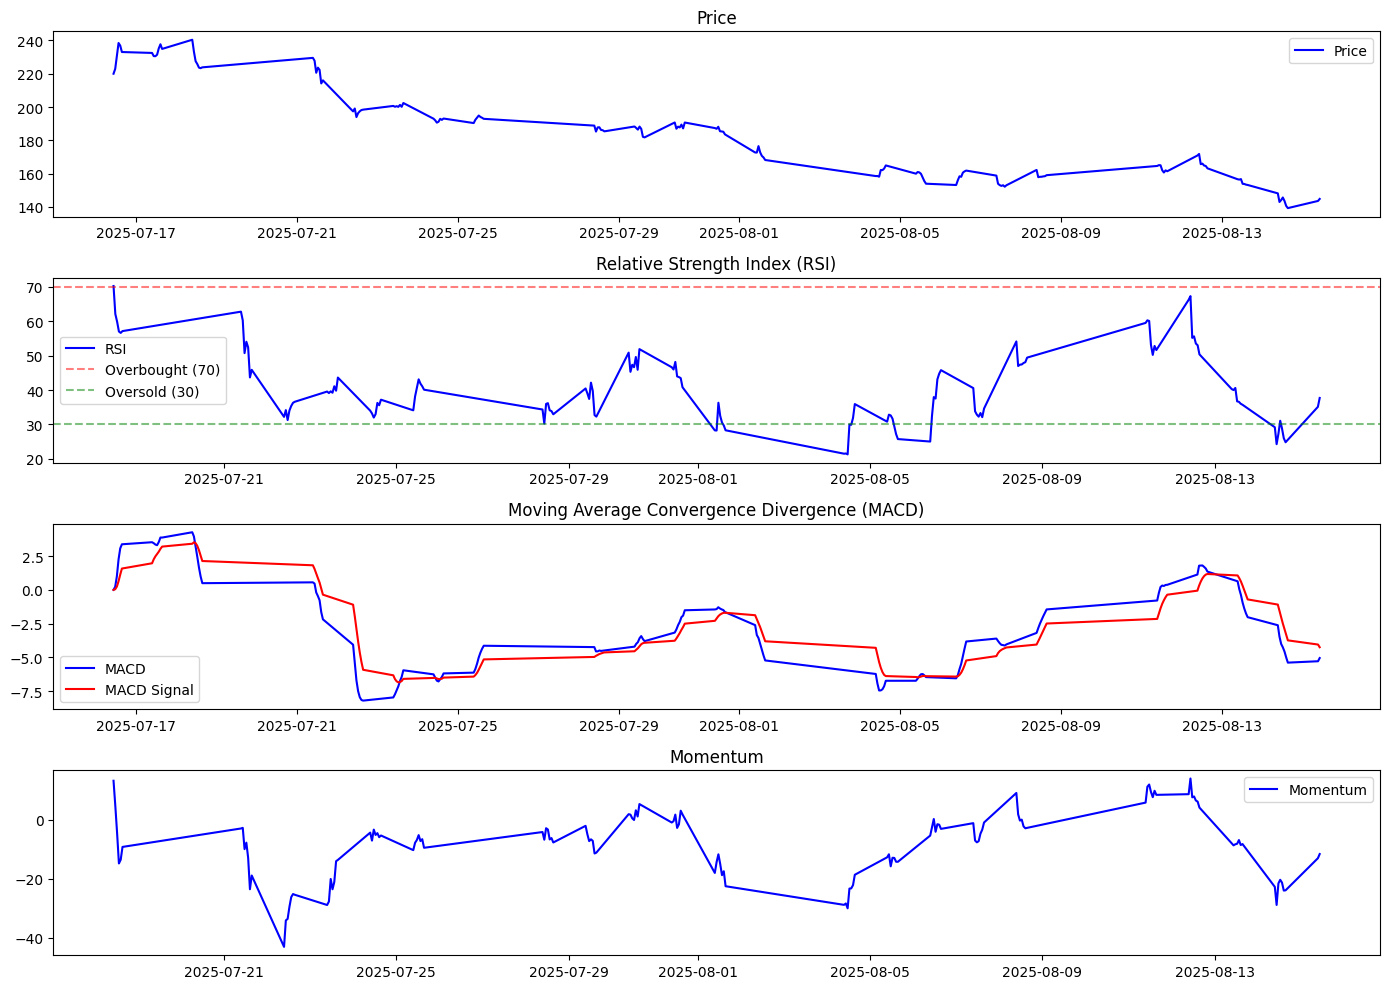

In [9]:

## plot the rsi momentum and MACD
import matplotlib.pyplot as plt

def graph_price_RSI_MACD_Momentum(df):
    plt.figure(figsize=(14, 10))
    # Plot Price
    plt.subplot(4, 1, 1)
    plt.plot(df.index, df["Price"], label="Price", color="blue")
    plt.title("Price")
    plt.legend()

    # Plot RSI
    plt.subplot(4, 1, 2)
    plt.plot(df.index, df["RSI"], label="RSI", color="blue")
    plt.axhline(70, linestyle="--", alpha=0.5, color="red", label="Overbought (70)")
    plt.axhline(30, linestyle="--", alpha=0.5, color="green", label="Oversold (30)")
    plt.title("Relative Strength Index (RSI)")
    plt.legend()

    # Plot MACD
    plt.subplot(4, 1, 3)
    plt.plot(df.index, df["MACD"], label="MACD", color="blue")
    plt.plot(df.index, df["MACD_Signal"], label="MACD Signal", color="red")
    plt.title("Moving Average Convergence Divergence (MACD)")
    plt.legend()

    # Plot Momentum
    plt.subplot(4, 1, 4)
    plt.plot(df.index, df["Momentum"], label="Momentum", color="blue")
    plt.title("Momentum")
    plt.legend()

    plt.tight_layout()
    plt.show()

print(f'The date range is from {start_date} to {end_date}')
print(f'The stock symbol is {stock_symbol}')
print(f'The data interval is {interval}')

graph_price_RSI_MACD_Momentum(df)
